# Homework 1
This is the template for the first homework assignment.
The only function that you are required to fill in and turn in to Gradescope is "compute_features".
Please do not edit definition of "compute_features" so the Gradescope unit tests run successfully.

In [1]:
# Uncomment and run this code if you want to verify your `sklearn` installation.
# If this cell outputs 'array([1])', then it's installed correctly.

# from sklearn import tree
# X = [[0, 0], [1, 1]]
# y = [0, 1]
# clf = tree.DecisionTreeClassifier(criterion='entropy')
# clf = clf.fit(X, y)
# clf.predict([[2, 2]])

In [2]:
from sklearn.metrics import accuracy_score
import numpy as np

In [3]:
# Loading in training data 
madelon_x_train = np.load('madelon/train/X_train.npy')
madelon_y_train = np.load('madelon/train/y_train.npy')
madelon_x_test = np.load('madelon/test/X_test.npy')
madelon_y_test = np.load('madelon/test/y_test.npy')

# print(madelon_x_train)
# print(madelon_y_train)
# print(madelon_x_test)
# print(madelon_y_test)

In [4]:
# Loading in badges data

badges_x_train = np.loadtxt('badges/train/train.names.txt', dtype=str)
badges_y_train = np.load('badges/train/y_train_badges.npy')
badges_x_test = np.loadtxt('badges/test/test_names_badges.txt', dtype=str)
badges_y_test = np.load('badges/test/y_test_badges.npy')

# print(badges_x_train)
# print(badges_y_train)
# print(badges_x_test)
# print(badges_y_test)

badges_x_train_transformed = np.empty(len(badges_x_train), dtype=np.dtype('U100'))
badges_x_test_transformed= np.empty(len(badges_x_test), dtype=np.dtype('U100'))

for i in range(0, len(badges_x_train)):
    badges_x_train_transformed[i] = (badges_x_train[i][0] + " " + badges_x_train[i][1])
    
for i in range(0, len(badges_x_test)):
    badges_x_test_transformed[i] = badges_x_test[i][0] + " " + badges_x_test[i][1]


# print(badges_x_train_transformed)
# print(badges_x_test_transformed)

# ord(badges_x_train_transformed[0].lower().split()[0][0])
# ord('a')
# min(5,6,7)
# badges_x_train_transformed[0].lower().split()

In [5]:
import numpy as np


# When you turn this function in to Gradescope, it is easiest to copy and paste this cell to a new python file called hw1.py
# and upload that file instead of the full Jupyter Notebook code (which will cause problems for Gradescope)
def compute_features(names):
    
    feature_array = np.zeros(shape=(len(names), 260), dtype=int)
    
    for i in range (0, len(names)):
        
        name_split = names[i].lower().split()
        
        for j in range (0,2):     
            
            for k in range (0, min(5, len(name_split[j]))):   
                
                buffer = (26*k) + (130*j) - 97
                position = ord(name_split[j][k]) + buffer
                feature_array[i][position] = 1
                
    
    return feature_array             

In [6]:
compute_features(badges_x_train_transformed)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

You are not required to use the functions defined below, but they may be useful for you to think about how to structure your code.

In [7]:
# Function to implement SGDClassifier model

from sklearn.linear_model import SGDClassifier

def train_and_evaluate_sgd(X_train, y_train, X_test, y_test):
    model = SGDClassifier(loss='log', max_iter=10000)
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    test_acc=accuracy_score(y_test, pred)
    
    return model.score(X_train, y_train), test_acc, model

In [8]:
# Function to implement Decision Tree and Decision Stump models

from sklearn.tree import DecisionTreeClassifier


def train_and_evaluate_decision_tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(criterion='entropy')
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    test_acc=accuracy_score(y_test, pred)
    
    return model.score(X_train, y_train), test_acc, model


def train_and_evaluate_decision_stump(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
    model = model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    test_acc=accuracy_score(y_test, pred)
    
    return model.score(X_train, y_train), test_acc, model

In [9]:
# Old function

# import random as rd
# import numpy as np

# def train_and_evaluate_sgd_with_stumps(X_train, y_train, X_test, y_test):
    
#     stump_outputs = np.empty(shape=(len(X_train),100))
#     test_outputs = np.empty(shape=(len(X_test),100))
    
#     for i in range (0,100):
#         feature_set=rd.sample(range(0,len(X_train[0])), k=int(len(X_train[0])/2))
#         x_train_split=X_train[:,feature_set]
#         model=DecisionTreeClassifier(criterion='entropy', max_depth=4)
#         model=model.fit(x_train_split, y_train)
#         pred=model.predict(x_train_split)
        
#         for j in range (0, len(pred)):
#             stump_outputs[j,i]=pred[j]
        
#         x_test_split=X_test[:,feature_set]
#         test_pred = model.predict(x_test_split)
#         for k in range (0, len(test_pred)):
#             test_outputs[k,i]=test_pred[k]
    
#     model_final = SGDClassifier(loss='log', max_iter=10000)
#     model_final = model_final.fit(stump_outputs, y_train)
#     pred_final = model_final.predict(test_outputs)
    
#     test_acc=accuracy_score(y_test, pred_final)
    
#     return model_final.score(stump_outputs, y_train), test_acc, model_final

In [10]:
import random as rd
import numpy as np

def create_feature_set(X_train):
    feature_set = np.empty(shape=(100, int(len(X_train[0])/2)), dtype=int)
    for i in range(0,100):
        feature_set[i]=rd.sample(range(0,len(X_train[0])), k=int(len(X_train[0])/2))
    
    return feature_set

def create_stump_models(X_train, y_train, feature_set):
    stump_models = np.empty(shape=100, dtype=object)
    for i in range (0,100):
        x_train_split=X_train[:,feature_set[i]]
        model=DecisionTreeClassifier(criterion='entropy', max_depth=4)
        model=model.fit(x_train_split, y_train)
        stump_models[i]=model
        
    return stump_models

def create_stump_pred_features(X_train, feature_set, stump_models):
    stump_pred_features = np.empty(shape=(len(X_train),100))
    for i in range (0,100):
        x_train_split=X_train[:,feature_set[i]]
        pred=stump_models[i].predict(x_train_split)
        
        for j in range (0, len(pred)):
            stump_pred_features[j,i]=pred[j]
    
    return stump_pred_features
    
def create_model_final(stump_pred_features, y_train):
    model_final = SGDClassifier(loss='log', max_iter=10000)
    model_final = model_final.fit(stump_pred_features, y_train)
    return model_final

def sgd_with_stumps_predictions(model_final, input_data):
    return model_final.predict(input_data)

def train_and_evaluate_sgd_with_stumps(X_train, y_train, X_test, y_test):
    feature_set = create_feature_set(X_train)
    stump_models = create_stump_models(X_train, y_train, feature_set)
    stump_predicted_features = create_stump_pred_features(X_train, feature_set, stump_models)
    final_model = create_model_final(stump_predicted_features, y_train)
    predictions = sgd_with_stumps_predictions(final_model, stump_predicted_features)
    
    test_stump_predicted_features = create_stump_pred_features(X_test, feature_set, stump_models)
    test_predictions = sgd_with_stumps_predictions(final_model, test_stump_predicted_features)
    
    train_acc = final_model.score(stump_predicted_features, y_train)
    test_acc = accuracy_score(test_predictions, y_test)
    
    return train_acc, test_acc, final_model, feature_set, stump_models
    

In [11]:
# train_and_evaluate_sgd_with_stumps(madelon_x_train, madelon_y_train, madelon_x_test, madelon_y_test)

In [12]:
def load_cv_split(fold):

    train_x= np.load('madelon/cross_validation/cv-train-X.' + str(fold) + '.npy')
    train_y= np.load('madelon/cross_validation/cv-train-y.' + str(fold) + '.npy')
    test_x= np.load('madelon/cross_validation/cv-heldout-X.' + str(fold) + '.npy')
    test_y= np.load('madelon/cross_validation/cv-heldout-y.' + str(fold) + '.npy')
    
    return train_x, train_y, test_x, test_y

In [13]:
sgd_train_acc_array=[]
dt_train_acc_array=[]
ds_train_acc_array=[]
cmbd_train_acc_array=[]

sgd_heldout_acc_array=[]
dt_heldout_acc_array=[]
ds_heldout_acc_array=[]
cmbd_heldout_acc_array=[]

for i in range(0,5):
    dl = load_cv_split(i)
    sgd = train_and_evaluate_sgd(dl[0], dl[1], dl[2], dl[3])
    tree = train_and_evaluate_decision_tree(dl[0], dl[1], dl[2], dl[3])
    stump = train_and_evaluate_decision_stump(dl[0], dl[1], dl[2], dl[3])
    combined = train_and_evaluate_sgd_with_stumps(dl[0], dl[1], dl[2], dl[3])
    
    sgd_train_acc_array.append(sgd[0])
    dt_train_acc_array.append(tree[0])
    ds_train_acc_array.append(stump[0])
    cmbd_train_acc_array.append(combined[0])

    sgd_heldout_acc_array.append(sgd[1])
    dt_heldout_acc_array.append(tree[1])
    ds_heldout_acc_array.append(stump[1])
    cmbd_heldout_acc_array.append(combined[1])

print("sgd_train_acc_array: " + str(sgd_train_acc_array))
print("dt_train_acc_array: " + str(dt_train_acc_array))
print("ds_train_acc_array: " + str(ds_train_acc_array))
print("cmbd_train_acc_array: " + str(cmbd_train_acc_array))
print()
print("sgd_heldout_acc_array: " + str(sgd_heldout_acc_array))
print("dt_heldout_acc_array: " + str(dt_heldout_acc_array))
print("ds_heldout_acc_array: " + str(ds_heldout_acc_array))
print("cmbd_heldout_acc_array: " + str(cmbd_heldout_acc_array))


sgd_train_acc_array: [0.7791666666666667, 0.8071428571428572, 0.7857142857142857, 0.7875, 0.7696428571428572]
dt_train_acc_array: [1.0, 1.0, 1.0, 1.0, 1.0]
ds_train_acc_array: [0.7636904761904761, 0.7488095238095238, 0.756547619047619, 0.7690476190476191, 0.7690476190476191]
cmbd_train_acc_array: [0.8857142857142857, 0.8601190476190477, 0.8845238095238095, 0.7589285714285714, 0.8809523809523809]

sgd_heldout_acc_array: [0.5880952380952381, 0.611904761904762, 0.5642857142857143, 0.5119047619047619, 0.6357142857142857]
dt_heldout_acc_array: [0.6523809523809524, 0.7214285714285714, 0.6833333333333333, 0.6880952380952381, 0.6333333333333333]
ds_heldout_acc_array: [0.7214285714285714, 0.6833333333333333, 0.7071428571428572, 0.6952380952380952, 0.7166666666666667]
cmbd_heldout_acc_array: [0.7904761904761904, 0.7642857142857142, 0.7761904761904762, 0.6595238095238095, 0.8071428571428572]


In [14]:
sgd_avg_train_acc = np.mean(sgd_train_acc_array)
dt_avg_train_acc = np.mean(dt_train_acc_array)
ds_avg_train_acc = np.mean(ds_train_acc_array)
cmbd_avg_train_acc = np.mean(cmbd_train_acc_array)

sgd_avg_heldout_acc = np.mean(sgd_heldout_acc_array)
dt_avg_heldout_acc = np.mean(dt_heldout_acc_array)
ds_avg_heldout_acc = np.mean(ds_heldout_acc_array)
cmbd_avg_heldout_acc = np.mean(cmbd_heldout_acc_array)

sgd_std_train_acc = np.std(sgd_train_acc_array)
dt_std_train_acc = np.std(dt_train_acc_array)
ds_std_train_acc = np.std(ds_train_acc_array)
cmbd_std_train_acc = np.std(cmbd_train_acc_array)

sgd_std_heldout_acc = np.std(sgd_heldout_acc_array)
dt_std_heldout_acc = np.std(dt_heldout_acc_array)
ds_std_heldout_acc = np.std(ds_heldout_acc_array)
cmbd_std_heldout_acc = np.std(cmbd_heldout_acc_array)

sgd_train_acc_ci = [sgd_avg_train_acc - 1.96*sgd_std_train_acc/(np.sqrt(len(sgd_train_acc_array))),
                   sgd_avg_train_acc + 1.96*sgd_std_train_acc/(np.sqrt(len(sgd_train_acc_array)))]
dt_train_acc_ci = [dt_avg_train_acc - 1.96*dt_std_train_acc/(np.sqrt(len(dt_train_acc_array))),
                   dt_avg_train_acc + 1.96*dt_std_train_acc/(np.sqrt(len(dt_train_acc_array)))]
ds_train_acc_ci = [ds_avg_train_acc - 1.96*ds_std_train_acc/(np.sqrt(len(ds_train_acc_array))),
                   ds_avg_train_acc + 1.96*ds_std_train_acc/(np.sqrt(len(ds_train_acc_array)))]
cmbd_train_acc_ci = [cmbd_avg_train_acc - 1.96*cmbd_std_train_acc/(np.sqrt(len(cmbd_train_acc_array))),
                   cmbd_avg_train_acc + 1.96*cmbd_std_train_acc/(np.sqrt(len(cmbd_train_acc_array)))]

sgd_heldout_acc_ci = [sgd_avg_heldout_acc - 1.96*sgd_std_heldout_acc/(np.sqrt(len(sgd_heldout_acc_array))),
                   sgd_avg_heldout_acc + 1.96*sgd_std_heldout_acc/(np.sqrt(len(sgd_heldout_acc_array)))]
dt_heldout_acc_ci = [dt_avg_heldout_acc - 1.96*dt_std_heldout_acc/(np.sqrt(len(dt_heldout_acc_array))),
                   dt_avg_heldout_acc + 1.96*dt_std_heldout_acc/(np.sqrt(len(dt_heldout_acc_array)))]
ds_heldout_acc_ci = [ds_avg_heldout_acc - 1.96*ds_std_heldout_acc/(np.sqrt(len(ds_heldout_acc_array))),
                   ds_avg_heldout_acc + 1.96*ds_std_heldout_acc/(np.sqrt(len(ds_heldout_acc_array)))]
cmbd_heldout_acc_ci = [cmbd_avg_heldout_acc - 1.96*cmbd_std_heldout_acc/(np.sqrt(len(cmbd_heldout_acc_array))),
                   cmbd_avg_heldout_acc + 1.96*cmbd_std_heldout_acc/(np.sqrt(len(cmbd_heldout_acc_array)))]

print("sgd_avg_train_acc: " + str(sgd_avg_train_acc))
print("dt_avg_train_acc: " + str(dt_avg_train_acc))
print("ds_avg_train_acc: " + str(ds_avg_train_acc))
print("cmbd_avg_train_acc: " + str(cmbd_avg_train_acc))
print()
print("sgd_avg_heldout_acc: " + str(sgd_avg_heldout_acc))
print("dt_avg_heldout_acc: " + str(dt_avg_heldout_acc))
print("ds_avg_heldout_acc: " + str(ds_avg_heldout_acc))
print("cmbd_avg_heldout_acc: " + str(cmbd_avg_heldout_acc))
print()
print("sgd_std_train_acc: " + str(sgd_std_train_acc))
print("dt_std_train_acc: " + str(dt_std_train_acc))
print("ds_std_train_acc: " + str(ds_std_train_acc))
print("cmbd_std_train_acc: " + str(cmbd_std_train_acc))
print()
print("sgd_std_heldout_acc: " + str(sgd_std_heldout_acc))
print("dt_std_heldout_acc: " + str(dt_std_heldout_acc))
print("ds_std_heldout_acc: " + str(ds_std_heldout_acc))
print("cmbd_std_heldout_acc: " + str(cmbd_std_heldout_acc))
print()
print("sgd_train_acc_ci: " + str(sgd_train_acc_ci))
print("dt_train_acc_ci: " + str(dt_train_acc_ci))
print("ds_train_acc_ci: " + str(ds_train_acc_ci))
print("cmbd_train_acc_ci: " + str(cmbd_train_acc_ci))
print()
print("sgd_heldout_acc_ci: " + str(sgd_heldout_acc_ci))
print("dt_heldout_acc_ci: " + str(dt_heldout_acc_ci))
print("ds_heldout_acc_ci: " + str(ds_heldout_acc_ci))
print("cmbd_heldout_acc_ci: " + str(cmbd_heldout_acc_ci))


sgd_avg_train_acc: 0.7858333333333334
dt_avg_train_acc: 1.0
ds_avg_train_acc: 0.7614285714285713
cmbd_avg_train_acc: 0.8540476190476192

sgd_avg_heldout_acc: 0.5823809523809523
dt_avg_heldout_acc: 0.6757142857142857
ds_avg_heldout_acc: 0.7047619047619047
cmbd_avg_heldout_acc: 0.7595238095238095

sgd_std_train_acc: 0.012356890537840505
dt_std_train_acc: 0.0
ds_std_train_acc: 0.007801026154955195
cmbd_std_train_acc: 0.04845603706809577

sgd_std_heldout_acc: 0.042527835355744975
dt_std_heldout_acc: 0.03046874909151694
ds_std_heldout_acc: 0.013964645998681122
cmbd_std_heldout_acc: 0.052011685413002474

sgd_train_acc_ci: [0.7750020412179444, 0.7966646254487224]
dt_train_acc_ci: [1.0, 1.0]
ds_train_acc_ci: [0.7545906705160917, 0.7682664723410509]
cmbd_train_acc_ci: [0.8115740298682506, 0.8965212082269878]

sgd_heldout_acc_ci: [0.5451036611107374, 0.6196582436511673]
dt_heldout_acc_ci: [0.6490072496043431, 0.7024213218242283]
ds_heldout_acc_ci: [0.6925213528498743, 0.7170024566739351]
cmbd_he

In [27]:
import os
import matplotlib.pyplot as plt


def plot_results(sgd_train_acc, sgd_train_std, sgd_heldout_acc, sgd_heldout_std, sgd_test_acc,
                 dt_train_acc, dt_train_std, dt_heldout_acc, dt_heldout_std, dt_test_acc,
                 dt4_train_acc, dt4_train_std, dt4_heldout_acc, dt4_heldout_std, dt4_test_acc,
                 stumps_train_acc, stumps_train_std, stumps_heldout_acc, stumps_heldout_std, stumps_test_acc):
    """
    Plots the final results from problem 2. For each of the 4 classifiers, pass
    the training accuracy, training standard deviation, held-out accuracy, held-out
    standard deviation, and testing accuracy.

    Although it should not be necessary, feel free to edit this method.
    """
    train_x_pos = [0, 4, 8, 12]
    cv_x_pos = [1, 5, 9, 13]
    test_x_pos = [2, 6, 10, 14]
    ticks = cv_x_pos

    labels = ['sgd', 'dt', 'dt4', 'stumps (4 x 50)']

    train_accs = [sgd_train_acc, dt_train_acc, dt4_train_acc, stumps_train_acc]
    train_errors = [sgd_train_std, dt_train_std, dt4_train_std, stumps_train_std]

    cv_accs = [sgd_heldout_acc, dt_heldout_acc, dt4_heldout_acc, stumps_heldout_acc]
    cv_errors = [sgd_heldout_std, dt_heldout_std, dt4_heldout_std, stumps_heldout_std]

    test_accs = [sgd_test_acc, dt_test_acc, dt4_test_acc, stumps_test_acc]

    fig, ax = plt.subplots()
    ax.bar(train_x_pos, train_accs, yerr=train_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='train')
    ax.bar(cv_x_pos, cv_accs, yerr=cv_errors, align='center', alpha=0.5, ecolor='black', capsize=10, label='held-out')
    ax.bar(test_x_pos, test_accs, align='center', alpha=0.5, capsize=10, label='test')
    ax.set_ylabel('Accuracy')
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_title('Models')
    ax.yaxis.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.savefig('ian_plt.png')

In [16]:
sgd_testing_results = train_and_evaluate_sgd(madelon_x_train, madelon_y_train, madelon_x_test, madelon_y_test)
dt_testing_results = train_and_evaluate_decision_tree(madelon_x_train, madelon_y_train, madelon_x_test, madelon_y_test)
ds_testing_results = train_and_evaluate_decision_stump(madelon_x_train, madelon_y_train, madelon_x_test, madelon_y_test)
cmbd_testing_results = train_and_evaluate_sgd_with_stumps(madelon_x_train, madelon_y_train, madelon_x_test, madelon_y_test)

print(sgd_testing_results)
print(dt_testing_results)
print(ds_testing_results)
print(cmbd_testing_results)

(0.7728571428571429, 0.585, SGDClassifier(loss='log', max_iter=10000))
(1.0, 0.655, DecisionTreeClassifier(criterion='entropy'))
(0.7538095238095238, 0.715, DecisionTreeClassifier(criterion='entropy', max_depth=4))
(0.8566666666666667, 0.785, SGDClassifier(loss='log', max_iter=10000), array([[ 62, 565, 303, ...,  54, 108, 124],
       [ 64, 232, 235, ..., 387,  35, 446],
       [328, 311, 433, ..., 318, 475, 333],
       ...,
       [564, 322, 130, ..., 212, 266,  33],
       [414, 355, 594, ...,  73,  35, 250],
       [ 14, 434, 143, ..., 521,  82, 105]]), array([DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entro

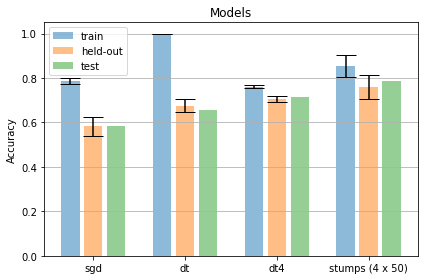

In [28]:
plot_results(sgd_avg_train_acc, sgd_std_train_acc, sgd_avg_heldout_acc, sgd_std_heldout_acc, sgd_testing_results[1],
             dt_avg_train_acc, dt_std_train_acc, dt_avg_heldout_acc, dt_std_heldout_acc, dt_testing_results[1],
             ds_avg_train_acc, ds_std_train_acc, ds_avg_heldout_acc, ds_std_heldout_acc, ds_testing_results[1],
             cmbd_avg_train_acc, cmbd_std_train_acc, cmbd_avg_heldout_acc, cmbd_std_heldout_acc, cmbd_testing_results[1])

In [18]:
def generate_txt_predictions(trained_model, X, filename):
    """
    This function will write the predictions txt files needed for your prediction submissions. You can access 
    your trained model by following the suggested return values in train_and_evaluate_sgd_with_stumps(). You
    should also be careful to write the correct filename as described in the write up.
    
    Parameters
    ----------
    trained_model: sklearn.base.BaseEstimator
        These are the sklearn models that you trained above on the training data.
    X_leaderboard: np.array
        The leaderboard features of shape (N_leaderboard, k)
    filename: String
        This is the name of the resulting txt file.
    
    """

    predicted_labels = trained_model.predict(X)
    np.savetxt("{}.txt".format(filename), predicted_labels, fmt='%i', newline="\n")



In [19]:
# Making predictions for unseen madelon datasets

madelon_leaderboard_x = np.load('madelon/leaderboard/X_leaderboard.npy')
madelon_hidden_x = np.load('madelon/hidden/X_hidden.npy')

madelon_final_model = cmbd_testing_results[2]
madelon_final_feature_set = cmbd_testing_results[3]
madelon_final_stumps = cmbd_testing_results[4]

madelon_leaderboard_input_set = create_stump_pred_features(madelon_leaderboard_x, 
                                                          madelon_final_feature_set, 
                                                          madelon_final_stumps)

madelon_hidden_input_set = create_stump_pred_features(madelon_hidden_x, 
                                                          madelon_final_feature_set, 
                                                          madelon_final_stumps)

# generate_txt_predictions(madelon_final_model, madelon_leaderboard_input_set, 
#                         'labels_2a_leaderboard')

# generate_txt_predictions(madelon_final_model, madelon_hidden_input_set, 
#                         'labels_2a_hidden')

In [20]:
# Running models for badges data 

badges_x_train_features = compute_features(badges_x_train_transformed)
badges_x_test_features = compute_features(badges_x_test_transformed)

sgd_badge = train_and_evaluate_sgd(badges_x_train_features, badges_y_train, 
                             badges_x_test_features, badges_y_test)
tree_badge = train_and_evaluate_decision_tree(badges_x_train_features, badges_y_train, 
                             badges_x_test_features, badges_y_test)
stump_badge = train_and_evaluate_decision_stump(badges_x_train_features, badges_y_train, 
                             badges_x_test_features, badges_y_test)
combined_badge = train_and_evaluate_sgd_with_stumps(badges_x_train_features, badges_y_train, 
                             badges_x_test_features, badges_y_test)

print("sgd_badge_results: " + str(sgd_badge))
print("dt_badge_results: " + str(tree_badge))
print("ds_badge_results: " + str(stump_badge))
print("cmbd_badge_results: " + str(combined_badge))

sgd_badge_results: (0.687, 0.575, SGDClassifier(loss='log', max_iter=10000))
dt_badge_results: (1.0, 0.455, DecisionTreeClassifier(criterion='entropy'))
ds_badge_results: (0.55, 0.5, DecisionTreeClassifier(criterion='entropy', max_depth=4))
cmbd_badge_results: (0.597, 0.57, SGDClassifier(loss='log', max_iter=10000), array([[146,  64,  31, ..., 230,  52, 202],
       [132,  91, 135, ...,   5,  36, 241],
       [139, 165, 151, ..., 147, 100, 149],
       ...,
       [ 63, 106,  79, ..., 176, 168,  46],
       [ 22,   8,  90, ..., 223, 173, 167],
       [140,  22, 156, ...,  92, 149,  37]]), array([DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       DecisionTreeClassifier(criterion='entropy', max_depth=4),
       Decisio

In [21]:
# Making predictions for badges data 

badges_leaderboard_x = np.loadtxt('badges/leaderboard/leaderboard_names_badges.txt', dtype=str)
badges_hidden_x = np.loadtxt('badges/hidden/hidden_names_badges.txt', dtype=str)

badges_x_leaderboard_transformed = np.empty(len(badges_leaderboard_x), dtype=np.dtype('U100'))
badges_x_hidden_transformed= np.empty(len(badges_hidden_x), dtype=np.dtype('U100'))

for i in range(0, len(badges_leaderboard_x)):
    badges_x_leaderboard_transformed[i] = (badges_leaderboard_x[i][0] + " " + badges_leaderboard_x[i][1])
    
for i in range(0, len(badges_hidden_x)):
    badges_x_hidden_transformed[i] = badges_hidden_x[i][0] + " " + badges_hidden_x[i][1]
    
badges_x_leaderboard_regular_features = compute_features(badges_x_leaderboard_transformed)
badges_x_hidden_regular_features = compute_features(badges_x_hidden_transformed)
    
# generate_txt_predictions(sgd_badge[2], badges_x_leaderboard_regular_features, 
#                         'labels_2b_leaderboard')
# generate_txt_predictions(sgd_badge[2], badges_x_hidden_regular_features, 
#                         'labels_2b_hidden')

In [37]:
# Enhanced compute_features function, with more features added 

def compute_features_enhanced(names):
    
        
    feature_array = np.zeros(shape=(len(names), 261), dtype=int)
    
    for i in range (0, len(names)):
        
        name_split = names[i].lower().split()
        
        for j in range (0,2):     
            
            for k in range (0, min(5, len(name_split[j]))):   
                
                buffer = (26*k) + (130*j) - 97
                position = ord(name_split[j][k]) + buffer
                feature_array[i][position] = 1
                
    
    for a in range (0, len(names)):
        
        name_split = names[a].lower().split()
        counter=0
        
        for b in range (0,2):     
            
            for c in range (0, len(name_split[b])):   
                
                letter = name_split[b][c]
                
                if letter in "aeiou":
                    counter+=1
        
        if(counter%2==0):
            feature_array[a][260]=0
        else:
            feature_array[a][260]=1
    
    return feature_array    

In [38]:
# Making predictions for badges data using enhanced compute features function

# print(badges_x_train_transformed)
# print(badges_y_train)

# for i in range (0,1000):
#     print(str(badges_x_train_transformed[i]) + ":    " + str(badges_y_train[i]))

In [39]:
enh_badges_x_train_features = compute_features_enhanced(badges_x_train_transformed)
enh_badges_x_test_features = compute_features_enhanced(badges_x_test_transformed)

enh_sgd_badge = train_and_evaluate_sgd(enh_badges_x_train_features, badges_y_train, 
                             enh_badges_x_test_features, badges_y_test)
enh_tree_badge = train_and_evaluate_decision_tree(enh_badges_x_train_features, badges_y_train, 
                             enh_badges_x_test_features, badges_y_test)
enh_stump_badge = train_and_evaluate_decision_stump(enh_badges_x_train_features, badges_y_train, 
                             enh_badges_x_test_features, badges_y_test)
# enh_combined_badge = train_and_evaluate_sgd_with_stumps(enh_badges_x_train_features, badges_y_train, 
#                              enh_badges_x_test_features, badges_y_test)

print("enh_sgd_badge_results: " + str(enh_sgd_badge))
print("enh_dt_badge_results: " + str(enh_tree_badge))
print("enh_ds_badge_results: " + str(enh_stump_badge))
# print("enh_cmbd_badge_results: " + str(enh_combined_badge))

enh_sgd_badge_results: (1.0, 1.0, SGDClassifier(loss='log', max_iter=10000))
enh_dt_badge_results: (1.0, 1.0, DecisionTreeClassifier(criterion='entropy'))
enh_ds_badge_results: (0.996, 1.0, DecisionTreeClassifier(criterion='entropy', max_depth=4))


In [32]:
enhanced_badges_leaderboard_x_features = compute_features_enhanced(badges_x_leaderboard_transformed)
enhanced_badges_hidden_x_features = compute_features_enhanced(badges_x_hidden_transformed)
# generate_txt_predictions(enh_tree_badge[2], enhanced_badges_leaderboard_x_features, 
#                         'labels_ec_leaderboard')
# generate_txt_predictions(enh_tree_badge[2], enhanced_badges_hidden_x_features, 
#                         'labels_ec_hidden')

In [33]:
# Generating all predictions 

generate_txt_predictions(madelon_final_model, madelon_leaderboard_input_set, 
                        'labels_2a_leaderboard')

generate_txt_predictions(madelon_final_model, madelon_hidden_input_set, 
                        'labels_2a_hidden')

generate_txt_predictions(sgd_badge[2], badges_x_leaderboard_regular_features, 
                        'labels_2b_leaderboard')

generate_txt_predictions(sgd_badge[2], badges_x_hidden_regular_features, 
                        'labels_2b_hidden')

generate_txt_predictions(enh_tree_badge[2], enhanced_badges_leaderboard_x_features, 
                        'labels_ec_leaderboard')

generate_txt_predictions(enh_tree_badge[2], enhanced_badges_hidden_x_features, 
                        'labels_ec_hidden')